# Libraries, Headers and Stuff

In [1]:
import sys
sys.path.append('../../src')

In [2]:
TEST_RATIO = .05

N_STATES = 128
N_EPOCHS = 50
BATCH_SIZE = 32

MAX_VOCAB_SIZE = -1
MAX_SEQUENCE_SIZE = -1

LAYERS_TO_CHECK = [0,1]

import scores
METRIC = scores.Correlation()

SAMPLES_VERIFY = 8

In [3]:
import datetime
import os

FOLDER_OUT = 'Linux2-' + str(datetime.datetime.today())[:16]
if not os.path.exists(FOLDER_OUT):
    os.makedirs(FOLDER_OUT)
    
print FOLDER_OUT

Linux2-2017-10-17 18:34


In [4]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


In [5]:
%load_ext rpy2.ipython

In [6]:
import random
random.seed(55555)

# Loads Model

In [7]:
import kernelhelpers
reload(kernelhelpers)

num_layer = 2

path = 'corpus/linux_kernel_val.txt'
model_weights = 'models/corpus_linux_kernel_val_architecture_stateful_type_char_layers_2_hidden_units_128_epoch_49_weights.h5'
model_settings_name = 'settings/corpus_linux_kernel_architecture_stateful_type_char_layers_2_hidden_units_128_settings.pickle'
new_batch_size = BATCH_SIZE
new_size = 1
new_time_skip = 1
is_stateful = True

# Loads the model
model,char2int,int2char,model_type = \
    kernelhelpers.load_setup(num_layer,
                path,
                model_weights,
                model_settings_name ,
                new_batch_size,
                new_size,
                new_time_skip,
                is_stateful)

128
lstm_2
128
lstm_3
Loading model settings/corpus_linux_kernel_architecture_stateful_type_char_layers_2_hidden_units_128_settings.pickle
type: basic_architecture


In [8]:
for layer in model.layers:
    print layer

# Creates dataset

In [9]:
raw_data = kernelhelpers.get_corpus('corpus/linux_input.txt')

print 'Number of charaters', len(raw_data)
print 'Number of charaters', len(set(raw_data))

Reading file corpus/linux_input.txt
Number of Words in Current Corpus: 6206996
Number of charaters 6206996
Number of charaters 75


In [10]:
import utils.preprocess as pre

# Generates data
full_size = len(raw_data)
train_size = int((1-TEST_RATIO) * full_size)

train_sequence = raw_data[:train_size]
test_sequence = raw_data[train_size:]

raw_train_sequence = [char2int[c] for c in train_sequence]
raw_test_sequence  = [char2int[c] for c in test_sequence]

# If necessary, truncates:
if MAX_SEQUENCE_SIZE > 0:
    train_size = int(MAX_SEQUENCE_SIZE * (1-TEST_RATIO))
    test_size = int(MAX_SEQUENCE_SIZE * TEST_RATIO)
    raw_train_sequence = raw_train_sequence[:train_size]
    raw_test_sequence  = raw_test_sequence[:test_size]

print 'Training smybols:', len(raw_train_sequence)
print 'Testing smybols:', len(raw_test_sequence)
print 'Size vocabulay:', len(char2int)

Training smybols: 5896646
Testing smybols: 310350
Size vocabulay: 75


In [11]:
import numpy as np
import utils.preprocess as pre
reload(pre)

# Preprocesses training
# SPLITS
X_train_raw = raw_train_sequence[:-1]
y_train_raw = raw_train_sequence[1:]
# ENCODES
X_train = pre.one_hot_encode_seq(X_train_raw, n_chars=len(int2char))
y_train = pre.one_hot_encode_seq(y_train_raw, n_chars=len(int2char))
# SHUFFLES
train_indices = pre.shuffle_indices(len(X_train_raw), BATCH_SIZE)
y_train = y_train[train_indices]
# EXPANDS
X_train = X_train[train_indices,np.newaxis,:]

# Preprocesses testing
# SPLITS
X_test_raw = raw_test_sequence[:-1]
y_test_raw = raw_test_sequence[1:]
# ENCODES
X_test = pre.one_hot_encode_seq(X_test_raw, n_chars=len(int2char))
y_test = pre.one_hot_encode_seq(y_test_raw, n_chars=len(int2char))
# SHUFFLES
test_indices = pre.shuffle_indices(len(X_test_raw), BATCH_SIZE)
X_test = X_test[test_indices, np.newaxis,:]
y_test = y_test[test_indices]

print "Training data:"
print "X:", X_train.shape
print "y:", y_train.shape

print "Test data:"
print "X:", X_test.shape
print "y:", y_test.shape

# Recovers the original training data
X_test_sequence = test_sequence[:X_test.shape[0]]
y_test_sequence = test_sequence[1:X_test.shape[0]+1]
print 'Test sequences:', X_test_sequence[:5], y_test_sequence[:5]
print 'length:', len(X_test_sequence), len(y_test_sequence)

Training data:
X: (5896640, 1, 75)
y: (5896640, 75)
Test data:
X: (310336, 1, 75)
y: (310336, 75)
Test sequences: ['d', 'a', 'y', ',', '\n'] ['a', 'y', ',', '\n', '\t']
length: 310336 310336


# Evaluate

In [12]:
model.reset_states()
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

309888/310336 [============================>.] - ETA: 0s('Test score:', 1.333730922458368)
('Test accuracy:', 0.62974969065786757)


In [13]:
# Generate samples
import generator as gen
reload(gen)

print gen.complete_sentence_stateful('if ', model, 256, char2int, int2char, BATCH_SIZE)
print '*****'
print gen.complete_sentence_stateful('else', model, 256, char2int, int2char, BATCH_SIZE)

Dimensions of sentence after encoding: (32, 3, 75)
Dimensions of sentence after generation: (32, 260, 75)
if is single_parents */
}

#undef folf_data
static inline int trace_module_rcu(struct rw_secve.cl) string.
 */
bool sys_rt_mutex;

/* call rcu_noc[] = going the callback for constrantion that kill to make implement are stack.
 * there a real pus all there all 
*****
Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 261, 75)
else:
	case prio_bpr_mp_task-20(30*)sizeof(ksdl_usec_ns, 0, shd_name);
	if (enable_type <= 2)
		cpu_buf_print_real(wrched->max_page_cmpnoralls);

	itimer_start	=
	{
		.prio_mask		= cpu(dl_t, i);
		raw_spin_unlock_irqrestore(&tasklist_lock);
		cpu = pcrash_name(


# Extracts features

In [12]:
import features as feat
reload(feat)

#alphabet = feat.alphabet()

brackets = feat.is_enclosed_bin('(', ')')
curly_brackets = feat.is_enclosed_bin('{', '}')
linepos = feat.line_char_pos_bin()
comments = feat.is_enclosed_str_nodepth('/*','*/')
quotes = feat.is_enclosed_str_nodepth('"', '"')
indent = feat.line_indent_level()
word_hash = feat.char_word_hash(5)
alphanum = feat.alphanum()
word_limits = feat.word_start_end()

r1 = feat.regex('return')
r2 = feat.regex('struct')
r3 = feat.regex('e')
r4 = feat.regex('\d')
r5 = feat.regex('\s')
r6 = feat.regex('\n')
r7 = feat.regex('if\s*\(.*\)')
r8 = feat.regex('for\s*\(.*\)')

features = [linepos, brackets, curly_brackets, comments, 
            indent, word_hash, quotes, alphanum, word_limits,
            r1, r2, r3, r4, r5, r6, r7, r8]

In [13]:
reload(feat)

feature_frame_x = feat.FeatureFrame(features, X_test_sequence)
feature_frame_x.extract()

feature_frame_y = feat.FeatureFrame(features, y_test_sequence)
feature_frame_y.extract()

print'Features for test sequence:'
print feature_frame_x.names
print feature_frame_x.values[:25,:]

print 'Features for test sequence labels:'
print feature_frame_y.names
print feature_frame_y.values[:25,:]

Generating feature scores
Running feature 0 out of 17
Added features ['pos0_10', 'pos10_20', 'pos20_30', 'pos30_40', 'pos40_50', '...']
Running feature 1 out of 17
Added features ["dep_'('')'_1", "dep_'('')'_2", "dep_'('')'_3"]
Running feature 2 out of 17
Added features ["dep_'{''}'_1", "dep_'{''}'_2", "dep_'{''}'_3", "dep_'{''}'_4", "dep_'{''}'_5", '...']
Running feature 3 out of 17
Added features ["enc_'/*''*/'"]
Running feature 4 out of 17
Added features ['indent0', 'indent1', 'indent2', 'indent3', 'indent4', '...']
Running feature 5 out of 17
Added features ['n_gram_0', 'n_gram_1', 'n_gram_2', 'n_gram_3', 'n_gram_4', '...']
Running feature 6 out of 17
Added features ['enc_\'"\'\'"\'']
Running feature 7 out of 17
Added features ['is_alphanum']
Running feature 8 out of 17
Added features ['word_lim']
Running feature 9 out of 17
Added features ["expr'return'"]
Running feature 10 out of 17
Added features ["expr'struct'"]
Running feature 11 out of 17
Added features ["expr'e'"]
Running fe

# Extracts hidden states

In [18]:
import extractor
reload(extractor)
    
ex=extractor.Extractor(model, LAYERS_TO_CHECK)
states = ex.get_states(X_test, batch_size=BATCH_SIZE, unshuffle=True)
nn_config = ex.get_structure()
nn_offsets = ex.get_offets()

print 'states shape:', states.shape
print 'config:', nn_config
print 'offets:', nn_offsets

BEWARE _ ONLY SUPPORTS CONSECUTIVE LAYER IDS STARTING AT 0
Creates spy models
... for id 0 : <controllers.mylstm_legacy.MYLSTM object at 0x120b5b750>
... for id 1 : <controllers.mylstm_legacy.MYLSTM object at 0x120b5bad0>
Gets the activations for the hidden states
Gets structure
Gets offets
WARNING +++ NOT SUITABLE FOR NON_FORWARD LAYERS
Gets structure
states shape: (310336, 256)
config: [('<controllers.mylstm_legacy.MYLSTM object at 0x120b5b750>', 1, 128), ('<controllers.mylstm_legacy.MYLSTM object at 0x120b5bad0>', 1, 128)]
offets: {(1, 0): 0, (0, 0): 0}


In [19]:
feat_names, feat_mat = feature_frame_x.data

/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


  [1] "d"  "a"  "y"  ","  "\n" "\t" "\t" "t"  "m"  "."  "t"  "m"  "_"  "h"  "o" 
 [16] "u"  "r"  ","  " "  "t"  "m"  "."  "t"  "m"  "_"  "m"  "i"  "n"  ","  " " 
 [31] "t"  "m"  "."  "t"  "m"  "_"  "s"  "e"  "c"  ","  "\n" "\t" "\t" "s"  "y" 
 [46] "s"  "_"  "t"  "z"  "."  "t"  "z"  "_"  "m"  "i"  "n"  "u"  "t"  "e"  "s" 
 [61] "w"  "e"  "s"  "t"  ")"  ";"  "\n" "\n" "\t" "k"  "d"  "b"  "_"  "s"  "y" 
 [76] "s"  "i"  "n"  "f"  "o"  "("  "&"  "v"  "a"  "l"  ")"  ";"  "\n" "\t" "k" 
 [91] "d"  "b"  "_"  "p"  "r"  "i"  "n"  "t"  "f"  "("  "\"" "u"  "p"  "t"  "i" 
[106] "m"  "e"  " "  " "  " "  " "  " "  "\"" ")"  ";"  "\n" "\t" "i"  "f"  " " 
[121] "("  "v"  "a"  "l"  "."  "u"  "p"  "t"  "i"  "m"  "e"  " "  ">"  " "  "(" 
[136] "2"  "4"  "*"  "6"  "0"  "*"  "6"  "0"  ")"  ")"  " "  "{"  "\n" "\t" "\t"


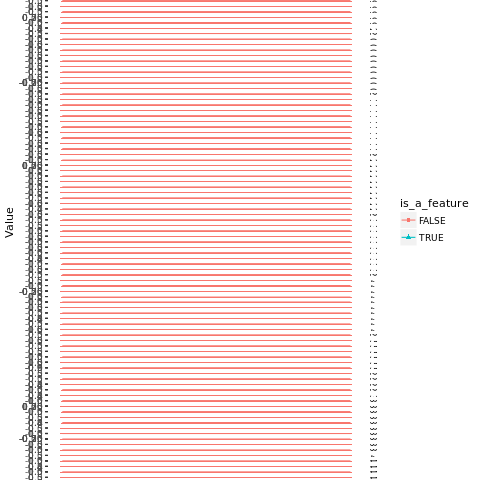

In [18]:
%%R -i feat_names,feat_mat,states,X_test_sequence,FOLDER_OUT

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names

to_plot <- filter(to_plot, Series %in%states_col_names | is_a_feature)
MAX_TIME <- 150 
to_plot <- filter(to_plot, time <= MAX_TIME)

labels <- X_test_sequence[1:MAX_TIME]
print(labels)

p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")

ggsave(paste0(FOLDER_OUT, '/activations.pdf'), p, width=40, height=49)

to_plot <- NULL
states <- NULL
feat_mat <- NULL

p

In [25]:
%%R -i feat_names,feat_mat,states,X_test_sequence,FOLDER_OUT

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

print(X_test_sequence)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
#to_plot[['text']] <- as.list(X_test_sequence)[1:nrow(to_plot)]
to_plot <-  gather(to_plot, key='Series', value='Value', -time)

MAX_TIME <- 3000 
to_plot <- filter(to_plot, time <= MAX_TIME)

to_plot$Value <- round(to_plot$Value, 2)
write.csv(to_plot, paste0(FOLDER_OUT, '/activations.csv'), row.names = FALSE)

to_plot <- NULL
states <- NULL
feat_mat <- NULL

KeyboardInterrupt: 

# Correlation based attribution

In [20]:
import scores
reload(scores)
import inspector as ip
reload(ip)

insp = ip.Inspector(nn_config, nn_offsets)
mi_scores, names = insp.inspect(states, feature_frame_x, scores.Correlation())

Computing attribution scores
Feture matrix dimensions: (310336, 40)
States dimensions: (310336, 256)
Computing score for feature 0: pos0_10
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 1: pos10_20
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 2: pos20_30
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 3: pos30_40
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 4: pos40_50
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 5: pos50_60
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 6: dep_'('')'_1
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neuro

In [21]:
fname = FOLDER_OUT + '/attributions'
hnames = [repr(n) for n in names]
header = ','.join(hnames)
np.savetxt(fname, mi_scores, delimiter=',', header=header, comments='')

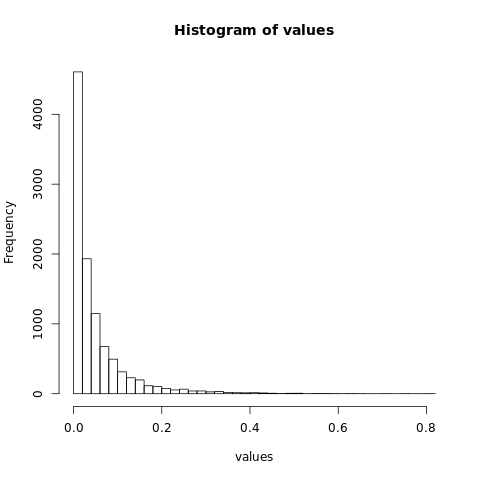

In [22]:
%%R -i mi_scores
values <- c(mi_scores)
hist(values, breaks=30)
mi_scores <- NULL

In [23]:
feature_neurons = insp.filter_attributions(ip.filter_threshold_abs(.05))
non_feature_neurons = insp.not_attributed()
feature_neurons

{"dep_'('')'_1": [(0, 0, 1),
  (0, 0, 5),
  (0, 0, 6),
  (0, 0, 7),
  (0, 0, 8),
  (0, 0, 9),
  (0, 0, 10),
  (0, 0, 11),
  (0, 0, 12),
  (0, 0, 17),
  (0, 0, 19),
  (0, 0, 24),
  (0, 0, 25),
  (0, 0, 27),
  (0, 0, 29),
  (0, 0, 30),
  (0, 0, 31),
  (0, 0, 35),
  (0, 0, 36),
  (0, 0, 41),
  (0, 0, 42),
  (0, 0, 45),
  (0, 0, 50),
  (0, 0, 53),
  (0, 0, 56),
  (0, 0, 57),
  (0, 0, 62),
  (0, 0, 64),
  (0, 0, 66),
  (0, 0, 67),
  (0, 0, 69),
  (0, 0, 71),
  (0, 0, 76),
  (0, 0, 77),
  (0, 0, 78),
  (0, 0, 79),
  (0, 0, 84),
  (0, 0, 85),
  (0, 0, 89),
  (0, 0, 91),
  (0, 0, 93),
  (0, 0, 95),
  (0, 0, 96),
  (0, 0, 97),
  (0, 0, 100),
  (0, 0, 101),
  (0, 0, 105),
  (0, 0, 108),
  (0, 0, 109),
  (0, 0, 112),
  (0, 0, 114),
  (0, 0, 117),
  (0, 0, 119),
  (0, 0, 122),
  (0, 0, 123),
  (0, 0, 124),
  (0, 0, 125),
  (0, 0, 126),
  (0, 0, 127),
  (1, 0, 0),
  (1, 0, 1),
  (1, 0, 2),
  (1, 0, 3),
  (1, 0, 5),
  (1, 0, 6),
  (1, 0, 9),
  (1, 0, 11),
  (1, 0, 12),
  (1, 0, 16),
  (1, 0, 17),
  

In [24]:
is_selected = np.zeros_like(mi_scores)
for j, fname in enumerate(names):
    for adress in feature_neurons[fname]:
        i = insp.address_to_column(*adress)
        is_selected[i,j] = 1

/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Ignoring unknown parameters: aes

  warnings.warn(x, RRuntimeWarning)


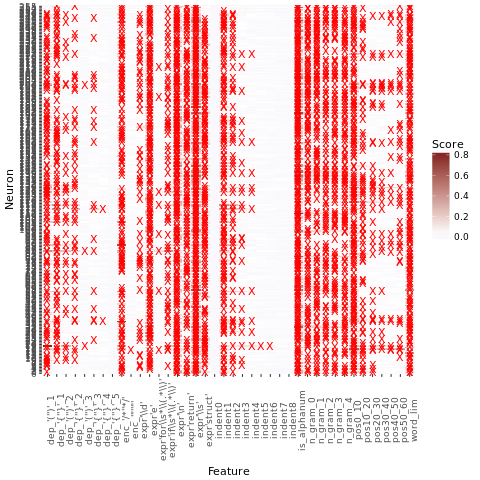

In [ ]:
%%R -i mi_scores,names,is_selected,N_STATES,FOLDER_OUT

library(ggplot2)
library(scales) 
library(dplyr)
library(tidyr)

# Gets scores
data <- as.data.frame(mi_scores)
names(data) <- names
data[['Neuron']] <- factor(0:(nrow(data)-1),
                           levels = 0:(nrow(data)-1),
                           labels = as.character(0:(nrow(data)-1)))
data <- gather(data, key='Feature', value='Score', -Neuron)

# Gets neuron selection
sel <- as.data.frame(is_selected)
names(sel) <- names
sel[['Neuron']] <- factor(0:(nrow(sel)-1),
                           levels = 0:(nrow(sel)-1),
                           labels = as.character(0:(nrow(sel)-1)))
sel <- gather(sel, key='Feature', value='selected', -Neuron)
sel$selected <- ifelse(sel$selected == 1, 'X', '')

# joins
to_plot <- inner_join(data,sel, by = c("Neuron", "Feature"))

p <- ggplot(to_plot, aes(x=Feature, y=Neuron, fill=Score, label=selected)) + 
                geom_bin2d(aes='identity') +
                geom_text(color='red') +
                scale_fill_gradient2(midpoint=median(to_plot$Score),
                                    low = muted("blue"), mid = "white",high = muted("red"),
                                    limits=c(0,NA)) +
                theme(axis.text.x = element_text(angle=90))

ggsave(paste0(FOLDER_OUT, '/attribution_map.pdf'), p, width=40, height=40)

mi_scores <- NULL
is_selected <- NULL
data <- NULL
sel <- NULL
to_plot <- NULL

p

# Does the Unit Test

In [ ]:
import scores
out_base = insp.test(states, feature_frame_x, non_feature_neurons, scores.LogRegF1())
out_base

Computing scores for pos30_40
Computing scores for expr'return'
Computing scores for expr'\\s'
Computing scores for indent1
Computing scores for indent0
ERROR Cant compute score: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0
Computing scores for indent3
Computing scores for indent2
Computing scores for indent5
Computing scores for indent4
Computing scores for indent7
Computing scores for indent6
Computing scores for dep_'('')'_1
Computing scores for dep_'('')'_2
Computing scores for dep_'('')'_3
Computing scores for n_gram_4
Computing scores for expr'struct'
Computing scores for n_gram_1
Computing scores for n_gram_0
Computing scores for n_gram_3
Computing scores for n_gram_2
Computing scores for enc_'/*''*/'
Computing scores for dep_'{''}'_5
Computing scores for dep_'{''}'_3
Computing scores for dep_'{''}'_2
Computing scores for dep_'{''}'_1
Computing scores for pos40_50
Computing scores for enc_'"''"'
Computing scores for pos50

{"dep_'('')'_1": 0.56732288320828561,
 "dep_'('')'_2": 0.20171571292939541,
 "dep_'('')'_3": 0.031461130772260155,
 "dep_'{''}'_1": 0.73587327541843173,
 "dep_'{''}'_2": 0.43615952024427918,
 "dep_'{''}'_3": 0.20334179180739823,
 "dep_'{''}'_4": 0.040991253585690945,
 "dep_'{''}'_5": 0.25357583490676094,
 'enc_\'"\'\'"\'': 0.18528224605564261,
 "enc_'/*''*/'": 0.56260429387609989,
 "expr'\\\\d'": 0.98972430936272282,
 "expr'\\\\s'": 0.39625197855637279,
 "expr'\\n'": 0.26092891852286176,
 "expr'e'": 0.33988888975789561,
 "expr'for\\\\s*\\\\(.*\\\\)'": 0.11791268464298721,
 "expr'if\\\\s*\\\\(.*\\\\)'": 0.34424252241216396,
 "expr'return'": 0.61819356081155663,
 "expr'struct'": 0.46845225680591124,
 'indent0': 0,
 'indent1': 0.72731502906140655,
 'indent2': 0.49899693328811495,
 'indent3': 0.2536501354865936,
 'indent4': 0.11692323895948838,
 'indent5': 0.046594452486769987,
 'indent6': 0.018871314252480204,
 'indent7': 0.10644310872086891,
 'indent8': 0.20387418488684314,
 'is_alphanum

In [ ]:
# With the correct neuronss 
out = insp.test(states, feature_frame_x, feature_neurons, scores.LogRegF1())
out

Computing scores for pos30_40
Computing scores for expr'return'
Computing scores for expr'\\s'
Computing scores for indent1
Computing scores for indent0
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for indent3
Computing scores for indent2
Computing scores for indent5
Computing scores for indent4
Computing scores for indent7
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for indent6
Computing scores for dep_'('')'_1
Computing scores for dep_'('')'_2
Computing scores for dep_'('')'_3
Computing scores for n_gram_4
Computing scores for expr'struct'
Computing scores for n_gram_1
Computing scores for n_gram_0
Computing scores for n_gram_3
Computing scores for n_gram_2
Computing scores for enc_'/*''*/'
Computing scores for dep_'{''}'_5
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is

{"dep_'('')'_1": 0.93233018136646706,
 "dep_'('')'_2": 0.28357887903127388,
 "dep_'('')'_3": 0.020368234344805527,
 "dep_'{''}'_1": 0.87602003217121194,
 "dep_'{''}'_2": 0.48486482945999471,
 "dep_'{''}'_3": 0.18844593632640194,
 "dep_'{''}'_4": 0.031733765022001932,
 "dep_'{''}'_5": 0,
 'enc_\'"\'\'"\'': 0.23072076487786844,
 "enc_'/*''*/'": 0.8885263807571554,
 "expr'\\\\d'": 0.99236414609418,
 "expr'\\\\s'": 0.99999069810706465,
 "expr'\\n'": 1.0,
 "expr'e'": 0.99988806053686163,
 "expr'for\\\\s*\\\\(.*\\\\)'": 0.077309940923684706,
 "expr'if\\\\s*\\\\(.*\\\\)'": 0.53523021863750619,
 "expr'return'": 0.81987289698002463,
 "expr'struct'": 0.81218887699881392,
 'indent0': 0,
 'indent1': 0.87231490801154798,
 'indent2': 0.57128841957064846,
 'indent3': 0.27773208845796499,
 'indent4': 0.11046110556068571,
 'indent5': 0.047380097307629959,
 'indent6': 0.016652972928152595,
 'indent7': 0,
 'indent8': 0,
 'is_alphanum': 0.9999565828447311,
 'n_gram_0': 0.40099098375902947,
 'n_gram_1': 0.

In [ ]:
# Prepares and saves a df
testnames = out.keys()
baseline = [out_base[t] for t in testnames]
candidate = [out[t] for t in testnames]

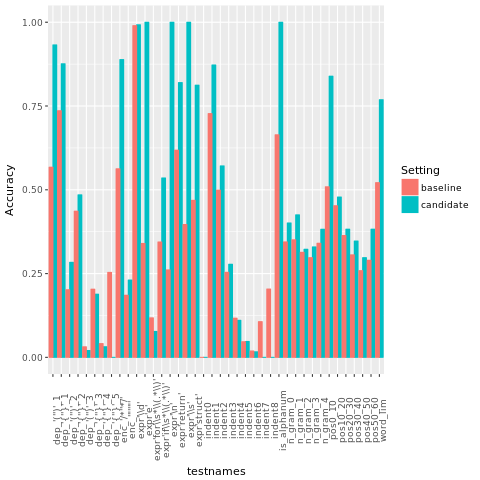

In [ ]:
%%R -i testnames,baseline,candidate,FOLDER_OUT

toplot <- data.frame(testnames, baseline, candidate)
write.csv(toplot, paste0(FOLDER_OUT,'/test_results'),row.names = FALSE)

dat <- gather(toplot, key='Setting', value='Accuracy', -testnames)

p <- ggplot(dat, aes(x=testnames, y=Accuracy, fill=Setting, color=Setting)) +
        geom_bar(stat='identity', position='dodge') +
        theme(axis.text.x = element_text(angle=90))

print(p)
ggsave(paste0(FOLDER_OUT, '/test_scores.pdf'), p, width=40, height=10)

# Kevinizes

In [ ]:
from controllers import control
reload(control)
import verify
reload(verify)

verifier = verify.Verifier(model, feature_neurons, non_feature_neurons)
v_scores = verifier.run(feature_frame_y, X_test, y_test, BATCH_SIZE, sample_size=SAMPLES_VERIFY)

*** Testing the neurons for feature pos0_10
* Computing original accuracy


/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* Computing baseline accuracies
Round 0
Round 1


/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
* Computing candidate accuracies
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
{'original': {0.0: [0.47319584561137501], 1.0: [0.53468127181929326]}, 'candidate': {0.0: [0.41542617607299104, 0.32872435231824942, 0.34699865084239939, 0.34699865084239939, 0.37816201875530497, 0.32872435231824942, 0.37816201875530497, 0.40153888020814194], 1.0: [0.45850272536974473, 0.39619006300671783, 0.36165709763537834, 0.36165709763537834, 0.45421956699311888, 0.39619006300671783, 0.45421956699311888, 0.43059117272281849]}, 'baseline': {0.0: [0.37998307271465048, 0.38724461511651148, 0.38724461511651148, 0.37998307271465048, 0.38724461511651148, 0.35379946244382465, 0.40930535631355441, 0.37998307271465048], 1.0: [0.45286622711406077, 0.43754689447941258, 0.43754689447941258, 0.45286622711406077, 0.43754689447941258, 0.43225516164453465, 0.48086449478335219, 0.45286622711406077]}}
*** Testing the neurons for feature pos10_20
* Computin

In [ ]:
for feat in v_scores:
    print '---', feat
    for setup in v_scores[feat]:
        print '-', setup
        for y in v_scores[feat][setup]:
            s = v_scores[feat][setup][y]
            print y, ':', 'mean:', np.mean(s), '- sd:', np.std(s) 

In [ ]:
verifier.test_diff()

In [ ]:
import pandas as pd

out = None

for feat in v_scores:
    print '---', feat
    for setup in v_scores[feat]:
        print '-', setup
        for y in v_scores[feat][setup]:
            s = np.array(v_scores[feat][setup][y])
            print y, ':', 'mean:', np.mean(s), '- sd:', np.std(s) 
            s_y = np.repeat(y, len(s))
            s_setup = np.repeat(setup, len(s))
            s_feat = np.repeat(feat, len(s))
            df = pd.DataFrame({
                'acc' : s,
                'feat_val': s_y,
                'feature': s_feat,
                'setup' : s_setup
            })
            if out is None:
                out = df
            else:
                out = pd.concat([out, df], axis = 0)

print out
out.to_csv(FOLDER_OUT+'/kevinizers.csv',index=False)

# Post experiment checks

In [ ]:
feat_names = feature_frame_x.names
feat_mat = feature_frame_x.values

In [ ]:
%%R -i feat_names,X_test_sequence,feat_mat,states

FEATURE <- c('n_gram_0')
NEURON <- c('_184')

MIN_TIME <- 0
MAX_TIME <- 1000

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names


to_plot <- filter(to_plot, Series %in% states_col_names | is_a_feature)
to_plot <- filter(to_plot, Series %in% c(FEATURE, NEURON))
to_plot <- filter(to_plot, time >= MIN_TIME, time <= MAX_TIME)

labels <- X_test_sequence[MIN_TIME:MAX_TIME]


p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")
print(p)

fi <- paste0('~/Desktop/focus', paste0(FEATURE, collapse=""), paste0(NEURON, collapse=""), '.pdf')
h <- length(FEATURE) + length(NEURON)
ggsave(fi, p, width=40, height=h)

In [ ]:
reload(feat)
f = feat.regex('return')
f = feat.regex('struct')
f = feat.regex('e')
f = feat.regex('\d')
f = feat.regex('\s')
f = feat.regex('\n')
f = feat.regex('if\s*\(.*\)')
f = feat.regex('for\s*\(.*\)')

t,names = f(X_test_sequence)

# ss = ''
# ff = ''
# for i,c in enumerate(X_test_sequence):
#     if c == '\n':
#         print ss
#         print ff
#         ss = ''
#         ff = ''
#     else:
#         ss += c
#         ff +=str(t[i])[0] # str(np.argmax(t[i,:]))